###   1. Hypothesis: We can derive an indication of AADT for local government roads from the Sample value in                      HERE historical data
-	Due by 6 November
-	New Austroads Guide to Temporary Traffic Management have a criteria to categorise state and local roads
-	Indication of AADT for local government roads (let’s say bands by 1000s) is desirable
-	Can the sample value in HERE historical data give us an indication of AADT?
-	Suggested approach/PoC – try to derive values from HERE by using a known AADT dataset


#### Load AADT 2018 data

In [200]:
import pandas as pd 
aadt_2018=pd.read_csv('trafficcensus2018.csv') #load from https://www.data.qld.gov.au/dataset/traffic-census-for-the-queensland-state-declared-road-network/resource/4b1011ec-61f1-4818-b44c-edfe15828a4e

### QA/QC  - check structure and for errors

In [202]:
aadt_2018.head()
aadt_2018.set_index('SITE_ID') 

,DESCRIPTION,LONGITUDE,LATITUDE,AADT,TDIST,PERCENT_HV,RSECT_ID,ROAD_NAME,TDIST_START,TDIST_END
SITE_ID,,,,,,,,,,
131646,Sth of Myora Res- Dunwich,153.411081,-27.482690,1942,2.500,13.25,1000,EAST COAST ROAD,0.000,9.360
131757,North of Beehive Rd,153.467567,-27.433770,1522,11.400,10.72,1000,EAST COAST ROAD,9.360,16.900
11412,80m south of Hillside Dve,153.233820,-27.732727,12134,0.500,22.26,1003,STAPYLTON - JACOBS WELL ROAD,0.000,1.090
12966,400m west of Quinns Rd,153.241597,-27.727702,8218,1.450,20.86,1003,STAPYLTON - JACOBS WELL ROAD,1.090,1.860
11754,600m east of Alberton Road,153.265828,-27.720495,4467,4.150,15.88,1003,STAPYLTON - JACOBS WELL ROAD,1.860,7.950
11543,At Behm Creek bridge,153.338545,-27.753331,1933,14.400,17.43,1003,STAPYLTON - JACOBS WELL ROAD,7.950,19.280
11548,Between Norman St & Scarborough St,153.410776,-27.961066,18753,0.150,8.88,101,SMITH STREET CONNECTION,0.000,0.480
11400,Between Kumbari Av & Parklands Dv,153.389276,-27.962996,51028,2.390,4.83,101,SMITH STREET CONNECTION,0.480,3.740
11545,1.5km west of Labrador-Carrara Rd Opass,153.361826,-27.962901,68524,5.200,3.27,101,SMITH STREET CONNECTION,3.740,7.400


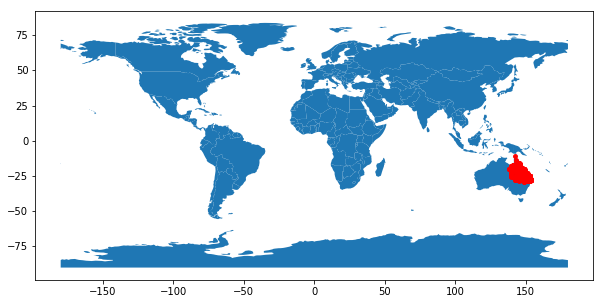

In [213]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
geometry = [Point(xy) for xy in zip(aadt_2018['LONGITUDE'],aadt_2018['LATITUDE'])]
aadt_2018_gdf = GeoDataFrame(aadt_2018, geometry=geometry)
aadt_2018_gdf.set_index('SITE_ID') 

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
aadt_2018_gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

### Install leaflet - skip if not required.
Before using requests we need a proxy
Yesterday we downloaded the px proxy and copied it to your training folder.

In Windows explorer navigate to the folder that contains px
In the Windows explorer address bar type "cmd" to open a dos prompt in that folder
Run "px.exe" to start the proxy server

pip install --proxy=localhost:3128 mppleaflet

In [209]:
aadt_2018_gdf

,SITE_ID,DESCRIPTION,LONGITUDE,LATITUDE,AADT,TDIST,PERCENT_HV,RSECT_ID,ROAD_NAME,TDIST_START,TDIST_END,geometry
0,131646,Sth of Myora Res- Dunwich,153.411081,-27.482690,1942,2.500,13.25,1000,EAST COAST ROAD,0.000,9.360,POINT (153.4110807 -27.4826895)
1,131757,North of Beehive Rd,153.467567,-27.433770,1522,11.400,10.72,1000,EAST COAST ROAD,9.360,16.900,POINT (153.4675671 -27.43376999)
2,11412,80m south of Hillside Dve,153.233820,-27.732727,12134,0.500,22.26,1003,STAPYLTON - JACOBS WELL ROAD,0.000,1.090,POINT (153.2338199 -27.73272664)
3,12966,400m west of Quinns Rd,153.241597,-27.727702,8218,1.450,20.86,1003,STAPYLTON - JACOBS WELL ROAD,1.090,1.860,POINT (153.2415967 -27.72770231)
4,11754,600m east of Alberton Road,153.265828,-27.720495,4467,4.150,15.88,1003,STAPYLTON - JACOBS WELL ROAD,1.860,7.950,POINT (153.2658279 -27.72049471)
5,11543,At Behm Creek bridge,153.338545,-27.753331,1933,14.400,17.43,1003,STAPYLTON - JACOBS WELL ROAD,7.950,19.280,POINT (153.3385448 -27.75333082)
6,11548,Between Norman St & Scarborough St,153.410776,-27.961066,18753,0.150,8.88,101,SMITH STREET CONNECTION,0.000,0.480,POINT (153.4107765 -27.96106645)
7,11400,Between Kumbari Av & Parklands Dv,153.389276,-27.962996,51028,2.390,4.83,101,SMITH STREET CONNECTION,0.480,3.740,POINT (153.3892765 -27.9629959)
8,11545,1.5km west of Labrador-Carrara Rd Opass,153.361826,-27.962901,68524,5.200,3.27,101,SMITH STREET CONNECTION,3.740,7.400,POINT (153.3618256 -27.96290083)
9,11403,Between Sunlight Dr & Billabong Pl,153.436673,-28.101401,28192,2.200,5.63,102,BURLEIGH CONNECTION ROAD,0.000,3.300,POINT (153.4366728 -28.10140129)


In [210]:
import mplleaflet
import matplotlib.pyplot as plt

## Size limitation displaying over 1000 points
## len(aadt_2018_gdf) shows 2218 = missing 1218 points over half
lons= aadt_2018_gdf['LONGITUDE'][0:1000].values.tolist()
lats= aadt_2018_gdf['LATITUDE'][0:1000].values.tolist()

fig = plt.figure(figsize=(8, 8))    #This is missing in your code.
plt.plot(lons, lats, 'r.')

#And after this call the funtion:
mplleaflet.display(fig=fig,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000424F4D68>]],
      dtype=object)

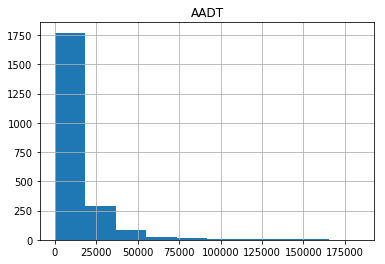

In [247]:
aadt_2018_gdf.hist('AADT') #Shows the count/frequency of counts - shows the majority of counts belwo 25000

In [268]:
aadt_2018_gdf['AADT'].describe().round()

count      2218.0
mean      11731.0
std       20398.0
min           0.0
25%         772.0
50%        3840.0
75%       14179.0
max      183592.0
Name: AADT, dtype: float64

In [276]:
aadt_2018_gdf_sort= aadt_2018_gdf.sort_values(by='AADT', ascending=False)
top_aadt_2018_gdf_sort=aadt_2018_gdf_sort[0:10] #top five aadt values
top_aadt_2018_gdf_sort

,SITE_ID,DESCRIPTION,LONGITUDE,LATITUDE,AADT,TDIST,PERCENT_HV,RSECT_ID,ROAD_NAME,TDIST_START,TDIST_END,geometry
295,140013,Opposite Sports Drive,153.120936,-27.608779,183592,1.900,NaN,12A,PACIFIC HIGHWAY,1.53,2.60,POINT (153.1209365 -27.60877908)
300,13008,580m south of Coombabah Crk PM5822,153.339972,-27.945860,170299,46.846,NaN,12A,PACIFIC HIGHWAY,44.05,47.83,POINT (153.3399721 -27.9458599)
299,12205,1.9 km North of Foxwell Rd,153.304080,-27.841132,160135,34.359,8.23,12A,PACIFIC HIGHWAY,14.28,44.05,POINT (153.3040795 -27.84113209)
2146,135970,Pine River Bridge,153.018231,-27.294103,155916,14.050,11.39,U14,GYMPIE ARTERIAL ROAD,13.50,14.31,POINT (153.0182314 -27.29410263)
43,135995,10A - South of Dohles Rocks Road,153.019171,-27.290882,155602,0.050,11.39,10A,BRUCE HIGHWAY,0.00,1.90,POINT (153.0191713 -27.29088219)
2130,136071,U12A - REX at Victoria Bridge,153.022562,-27.472019,155102,0.500,NaN,U12A,SOUTH-EAST ARTERIAL ROAD,0.30,0.73,POINT (153.0225616 -27.47201939)
2131,136072,U12A - REX adjacent Alice Street,153.025489,-27.475753,155082,1.000,NaN,U12A,SOUTH-EAST ARTERIAL ROAD,0.73,1.20,POINT (153.0254892 -27.47575332)
294,136076,500m South of Underwood Rd Opass,153.113883,-27.597831,152136,0.500,8.17,12A,PACIFIC HIGHWAY,0.00,1.53,POINT (153.1138827 -27.59783113)
2134,136074,U12A - PM adjacent Sunshine Avenue,153.040625,-27.512275,146404,5.500,NaN,U12A,SOUTH-EAST ARTERIAL ROAD,4.56,7.65,POINT (153.0406253 -27.51227521)
296,131796,Pac Mway sth side Paradise Rd overpass,153.140291,-27.639688,145557,5.900,10.63,12A,PACIFIC HIGHWAY,2.60,6.54,POINT (153.1402906 -27.63968784)


In [290]:
lons= top_aadt_2018_gdf_sort['LONGITUDE'][0:1000].values.tolist()
lats= top_aadt_2018_gdf_sort['LATITUDE'][0:1000].values.tolist()

fig = plt.figure(figsize=(8, 8))    #This is missing in your code.
plt.plot(lons, lats, 'r.',markersize=25,markeredgecolor='black')

#And after this call the funtion:
mplleaflet.display(fig=fig)

In [291]:
top_aadt_2018_gdf_sort

,SITE_ID,DESCRIPTION,LONGITUDE,LATITUDE,AADT,TDIST,PERCENT_HV,RSECT_ID,ROAD_NAME,TDIST_START,TDIST_END,geometry
295,140013,Opposite Sports Drive,153.120936,-27.608779,183592,1.900,NaN,12A,PACIFIC HIGHWAY,1.53,2.60,POINT (153.1209365 -27.60877908)
300,13008,580m south of Coombabah Crk PM5822,153.339972,-27.945860,170299,46.846,NaN,12A,PACIFIC HIGHWAY,44.05,47.83,POINT (153.3399721 -27.9458599)
299,12205,1.9 km North of Foxwell Rd,153.304080,-27.841132,160135,34.359,8.23,12A,PACIFIC HIGHWAY,14.28,44.05,POINT (153.3040795 -27.84113209)
2146,135970,Pine River Bridge,153.018231,-27.294103,155916,14.050,11.39,U14,GYMPIE ARTERIAL ROAD,13.50,14.31,POINT (153.0182314 -27.29410263)
43,135995,10A - South of Dohles Rocks Road,153.019171,-27.290882,155602,0.050,11.39,10A,BRUCE HIGHWAY,0.00,1.90,POINT (153.0191713 -27.29088219)
2130,136071,U12A - REX at Victoria Bridge,153.022562,-27.472019,155102,0.500,NaN,U12A,SOUTH-EAST ARTERIAL ROAD,0.30,0.73,POINT (153.0225616 -27.47201939)
2131,136072,U12A - REX adjacent Alice Street,153.025489,-27.475753,155082,1.000,NaN,U12A,SOUTH-EAST ARTERIAL ROAD,0.73,1.20,POINT (153.0254892 -27.47575332)
294,136076,500m South of Underwood Rd Opass,153.113883,-27.597831,152136,0.500,8.17,12A,PACIFIC HIGHWAY,0.00,1.53,POINT (153.1138827 -27.59783113)
2134,136074,U12A - PM adjacent Sunshine Avenue,153.040625,-27.512275,146404,5.500,NaN,U12A,SOUTH-EAST ARTERIAL ROAD,4.56,7.65,POINT (153.0406253 -27.51227521)
296,131796,Pac Mway sth side Paradise Rd overpass,153.140291,-27.639688,145557,5.900,10.63,12A,PACIFIC HIGHWAY,2.60,6.54,POINT (153.1402906 -27.63968784)


In [227]:
#Find out what are the largest counters are 
#mask = aadt_2018_gdf['AADT'] >= 150000
#aadt_2018_gdf.loc[mask]



columns_of_interest = ['SITE_ID', 'DESCRIPTION','AADT', 'geometry']
aadt_2018_gdf_lite = aadt_2018_gdf[columns_of_interest]
aadt_2018_gdf_lite.set_index('SITE_ID') 

,SITE_ID,DESCRIPTION,AADT,geometry
295,140013,Opposite Sports Drive,183592,POINT (153.1209365 -27.60877908)


In [190]:
mask = aadt_2018_gdf['AADT'] < 1500 #take out the maximum (aadt_2018_gdf['AADT'].max())
test = aadt_2018_gdf.loc[mask]
test['AADT'].hist()
test['AADT'].mean()
test['AADT'].min()
test['AADT'].max()
len(test['AADT'])

19      1095
20      1408
313     1417
314     1473
383      331
384      326
385      556
386      410
387      455
388      464
389      444
390      705
391      624
392      890
394      507
395      327
396      292
397      327
398      292
399      343
400      339
409      539
411      987
412      184
413      908
422     1295
424     1254
425      911
426      985
427     1338
        ... 
2083      22
2084      25
2085      40
2086      52
2087      73
2088     145
2089     520
2090     433
2091     323
2092     762
2093    1462
2095     668
2096     234
2097     203
2098     193
2099      38
2100      13
2115     231
2116     240
2117     231
2118      73
2119      32
2120     100
2121     549
2122     823
2123     130
2124     139
2125      81
2126      73
2187     369
Name: AADT, Length: 766, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


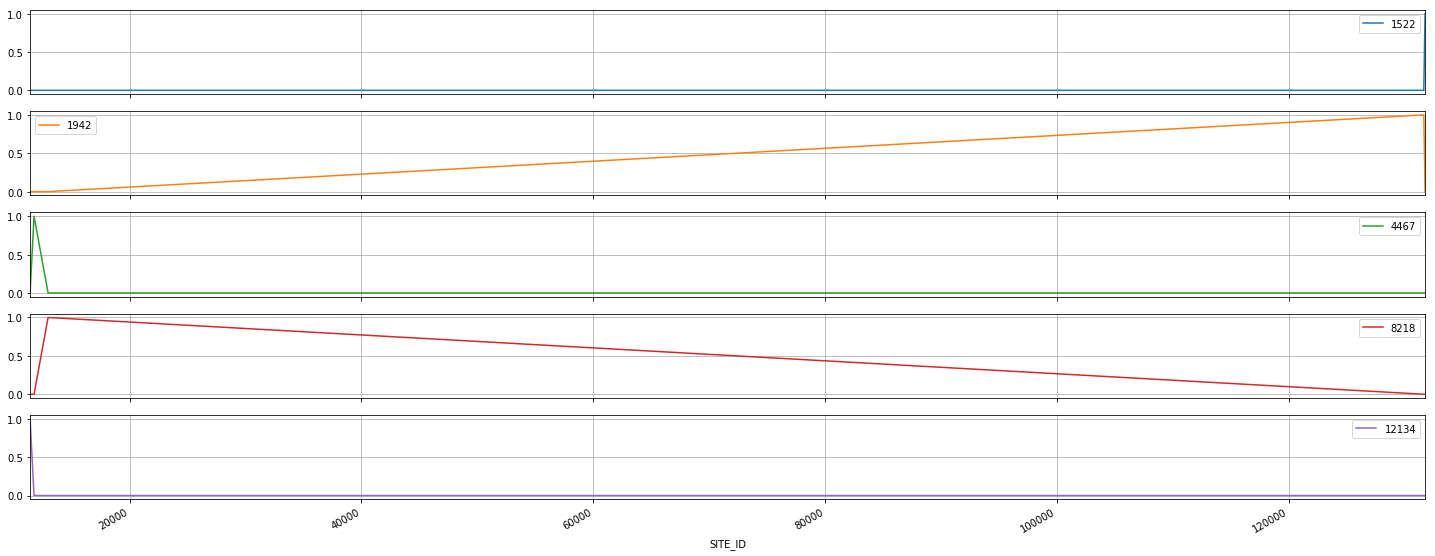

In [160]:
top_aadt_2018 = aadt_2018_gdf[0:5]
top_aadt_2018['Indicator'] = 1

top_aadt_2018.pivot_table(
    index = 'SITE_ID',
    columns ='AADT',
    values = 'Indicator',   aggfunc=len, fill_value=0).plot(subplots=True, figsize=(25,10), grid= True);

In [147]:
mask = aadt_2018_gdf['LATITUDE'] <= -26
aadt_2018_gdf.loc[mask]

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
        ... 
2188    True
2189    True
2190    True
2191    True
2192    True
2193    True
2194    True
2195    True
2196    True
2197    True
2198    True
2199    True
2200    True
2201    True
2202    True
2203    True
2204    True
2205    True
2206    True
2207    True
2208    True
2209    True
2210    True
2211    True
2212    True
2213    True
2214    True
2215    True
2216    True
2217    True
Name: LATITUDE, Length: 2218, dtype: bool

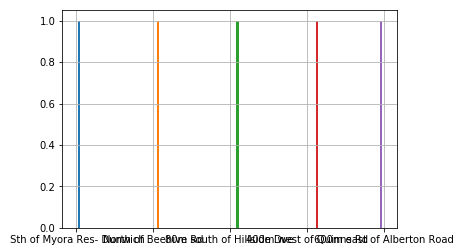

In [170]:
#top_aadt_2018['AADT'].hist(bins=20, density=True)
top_aadt_2018['DESCRIPTION'].hist(bins=20, density=True)

In [155]:
top_aadt_2018

,SITE_ID,DESCRIPTION,LONGITUDE,LATITUDE,AADT,TDIST,PERCENT_HV,RSECT_ID,ROAD_NAME,TDIST_START,TDIST_END,geometry,Indicator
0,131646,Sth of Myora Res- Dunwich,153.411081,-27.482690,1942,2.50,13.25,1000,EAST COAST ROAD,0.00,9.36,POINT (153.4110807 -27.4826895),1
1,131757,North of Beehive Rd,153.467567,-27.433770,1522,11.40,10.72,1000,EAST COAST ROAD,9.36,16.90,POINT (153.4675671 -27.43376999),1
2,11412,80m south of Hillside Dve,153.233820,-27.732727,12134,0.50,22.26,1003,STAPYLTON - JACOBS WELL ROAD,0.00,1.09,POINT (153.2338199 -27.73272664),1
3,12966,400m west of Quinns Rd,153.241597,-27.727702,8218,1.45,20.86,1003,STAPYLTON - JACOBS WELL ROAD,1.09,1.86,POINT (153.2415967 -27.72770231),1
4,11754,600m east of Alberton Road,153.265828,-27.720495,4467,4.15,15.88,1003,STAPYLTON - JACOBS WELL ROAD,1.86,7.95,POINT (153.2658279 -27.72049471),1


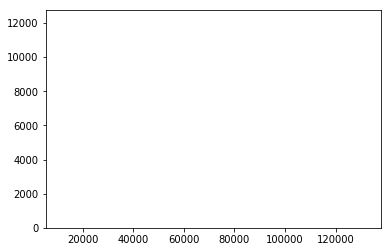

In [159]:
lons= aadt_2018_gdf['LONGITUDE'][0:1000].values.tolist()
lats= aadt_2018_gdf['LATITUDE'][0:1000].values.tolist()

plt.bar(top_aadt_2018['SITE_ID'],top_aadt_2018['AADT'])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000003A5E3748>,
      dtype=object)

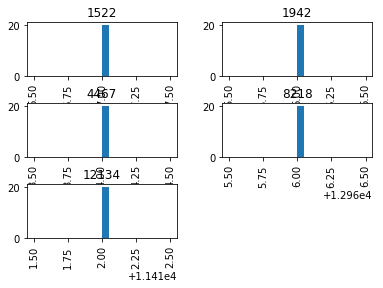

In [166]:
top_aadt_2018.hist(bins=20, by='AADT', density=True, column='SITE_ID')

In [171]:
mask = aadt_2018_gdf['ROAD_NAME'] like 'BRUCE HWY'
aadt_2018_gdf.loc[mask]

SyntaxError: invalid syntax (<ipython-input-171-0a8f519e9133>, line 1)

In [172]:
bruce_hwy_aadt=aadt_2018_gdf.filter(like='BRUCE HWY', axis='ROAD_NAME')

ValueError: No axis named ROAD_NAME for object type <class 'type'>

In [173]:
aadt_2018_gdf

,SITE_ID,DESCRIPTION,LONGITUDE,LATITUDE,AADT,TDIST,PERCENT_HV,RSECT_ID,ROAD_NAME,TDIST_START,TDIST_END,geometry
0,131646,Sth of Myora Res- Dunwich,153.411081,-27.482690,1942,2.500,13.25,1000,EAST COAST ROAD,0.000,9.360,POINT (153.4110807 -27.4826895)
1,131757,North of Beehive Rd,153.467567,-27.433770,1522,11.400,10.72,1000,EAST COAST ROAD,9.360,16.900,POINT (153.4675671 -27.43376999)
2,11412,80m south of Hillside Dve,153.233820,-27.732727,12134,0.500,22.26,1003,STAPYLTON - JACOBS WELL ROAD,0.000,1.090,POINT (153.2338199 -27.73272664)
3,12966,400m west of Quinns Rd,153.241597,-27.727702,8218,1.450,20.86,1003,STAPYLTON - JACOBS WELL ROAD,1.090,1.860,POINT (153.2415967 -27.72770231)
4,11754,600m east of Alberton Road,153.265828,-27.720495,4467,4.150,15.88,1003,STAPYLTON - JACOBS WELL ROAD,1.860,7.950,POINT (153.2658279 -27.72049471)
5,11543,At Behm Creek bridge,153.338545,-27.753331,1933,14.400,17.43,1003,STAPYLTON - JACOBS WELL ROAD,7.950,19.280,POINT (153.3385448 -27.75333082)
6,11548,Between Norman St & Scarborough St,153.410776,-27.961066,18753,0.150,8.88,101,SMITH STREET CONNECTION,0.000,0.480,POINT (153.4107765 -27.96106645)
7,11400,Between Kumbari Av & Parklands Dv,153.389276,-27.962996,51028,2.390,4.83,101,SMITH STREET CONNECTION,0.480,3.740,POINT (153.3892765 -27.9629959)
8,11545,1.5km west of Labrador-Carrara Rd Opass,153.361826,-27.962901,68524,5.200,3.27,101,SMITH STREET CONNECTION,3.740,7.400,POINT (153.3618256 -27.96290083)
9,11403,Between Sunlight Dr & Billabong Pl,153.436673,-28.101401,28192,2.200,5.63,102,BURLEIGH CONNECTION ROAD,0.000,3.300,POINT (153.4366728 -28.10140129)
